# Pandas for Data Analysis (Part 2 of 2)

In [1]:
import numpy as np
import pandas as pd

### Creating a DataFrame

In [2]:
index = pd.DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04'], name='DateTime', freq='D')
index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04'], dtype='datetime64[ns]', name='DateTime', freq='D')

In [3]:
columns = ['A', 'B', 'C']
columns

['A', 'B', 'C']

In [4]:
values = np.array([[0.1, np.NaN, 100],
                   [1.3, 1.0,      0.4],
                   [0.8, 1.0,      0.9],
                   [0.6, np.NaN, 1.5]])
values

array([[   0.1,    nan,  100. ],
       [   1.3,    1. ,    0.4],
       [   0.8,    1. ,    0.9],
       [   0.6,    nan,    1.5]])

In [5]:
df = pd.DataFrame(values, index=index, columns=columns)
df

,A,B,C
DateTime,,,
2018-01-01,0.1,NaN,100.0
2018-01-02,1.3,1.0,0.4
2018-01-03,0.8,1.0,0.9
2018-01-04,0.6,NaN,1.5


### Mean and Cumsum

In [6]:
df.mean()  # Mean of each column

A     0.7
B     1.0
C    25.7
dtype: float64

In [7]:
df.mean(axis=1)  # Mean of each row

DateTime
2018-01-01    50.05
2018-01-02     0.90
2018-01-03     0.90
2018-01-04     1.05
Freq: D, dtype: float64

In [8]:
df

,A,B,C
DateTime,,,
2018-01-01,0.1,NaN,100.0
2018-01-02,1.3,1.0,0.4
2018-01-03,0.8,1.0,0.9
2018-01-04,0.6,NaN,1.5


In [9]:
df.apply(np.cumsum)  # Cumulative sum along each column

,A,B,C
DateTime,,,
2018-01-01,0.1,NaN,100.0
2018-01-02,1.4,1.0,100.4
2018-01-03,2.2,2.0,101.3
2018-01-04,2.8,NaN,102.8


In [10]:
df.apply(np.cumsum, axis=1)  # Cumulative sum along each row

,A,B,C
DateTime,,,
2018-01-01,0.1,NaN,100.1
2018-01-02,1.3,2.3,2.7
2018-01-03,0.8,1.8,2.7
2018-01-04,0.6,NaN,2.1


### Breaking and Joining DataFrames

In [11]:
df

,A,B,C
DateTime,,,
2018-01-01,0.1,NaN,100.0
2018-01-02,1.3,1.0,0.4
2018-01-03,0.8,1.0,0.9
2018-01-04,0.6,NaN,1.5


In [12]:
df.iloc[:1]  # Zeroth row

,A,B,C
DateTime,,,
2018-01-01,0.1,NaN,100.0


In [13]:
df.iloc[1:3]  # First and second rows

,A,B,C
DateTime,,,
2018-01-02,1.3,1.0,0.4
2018-01-03,0.8,1.0,0.9


In [14]:
df.iloc[3:]  # Last row

,A,B,C
DateTime,,,
2018-01-04,0.6,NaN,1.5


In [15]:
pd.concat([df.iloc[:1], df.iloc[1:3], df.iloc[3:]])  # Concatenation

,A,B,C
DateTime,,,
2018-01-01,0.1,NaN,100.0
2018-01-02,1.3,1.0,0.4
2018-01-03,0.8,1.0,0.9
2018-01-04,0.6,NaN,1.5


In [16]:
df.iloc[:, 0]  # Zeroth column

DateTime
2018-01-01    0.1
2018-01-02    1.3
2018-01-03    0.8
2018-01-04    0.6
Freq: D, Name: A, dtype: float64

In [17]:
df.iloc[:, 1:]  # The rest of the columns

,B,C
DateTime,,
2018-01-01,NaN,100.0
2018-01-02,1.0,0.4
2018-01-03,1.0,0.9
2018-01-04,NaN,1.5


In [18]:
pd.concat([df.iloc[:, 0], df.iloc[:, 1:]], axis=1)  # Concatenation

,A,B,C
DateTime,,,
2018-01-01,0.1,NaN,100.0
2018-01-02,1.3,1.0,0.4
2018-01-03,0.8,1.0,0.9
2018-01-04,0.6,NaN,1.5


### Grouping

In [19]:
dict3 = {'Day':   ['Mon',   'Tue',   'Mon',    'Tue',    'Mon'],
         'Fruit': ['Apple', 'Apple', 'Banana', 'Banana', 'Apple'],
         'Pound': [10,      15,      50,       40,       5],
         'Profit':[20,      30,      25,       20,       10]}
df3 = pd.DataFrame(dict3)
df3

,Day,Fruit,Pound,Profit
0,Mon,Apple,10,20
1,Tue,Apple,15,30
2,Mon,Banana,50,25
3,Tue,Banana,40,20
4,Mon,Apple,5,10


In [20]:
df3.groupby('Day').sum()  # Group and apply sum() to the resulting groups


,Pound,Profit
Day,,
Mon,65,55
Tue,55,50


In [21]:
df3.groupby('Fruit').sum()

,Pound,Profit
Fruit,,
Apple,30,60
Banana,90,45


In [22]:
df3

,Day,Fruit,Pound,Profit
0,Mon,Apple,10,20
1,Tue,Apple,15,30
2,Mon,Banana,50,25
3,Tue,Banana,40,20
4,Mon,Apple,5,10


In [23]:
df3.groupby(['Day', 'Fruit']).sum()  # Grouping by multiple columns

Pound  Profit
Day Fruit                
Mon Apple      15      30
    Banana     50      25
Tue Apple      15      30
    Banana     40      20

In [24]:
stacked = df3.stack()  # Stacking
stacked

0  Day          Mon
   Fruit      Apple
   Pound         10
   Profit        20
1  Day          Tue
   Fruit      Apple
   Pound         15
   Profit        30
2  Day          Mon
   Fruit     Banana
   Pound         50
   Profit        25
3  Day          Tue
   Fruit     Banana
   Pound         40
   Profit        20
4  Day          Mon
   Fruit      Apple
   Pound          5
   Profit        10
dtype: object

In [25]:
stacked.unstack(1)

,Day,Fruit,Pound,Profit
0,Mon,Apple,10,20
1,Tue,Apple,15,30
2,Mon,Banana,50,25
3,Tue,Banana,40,20
4,Mon,Apple,5,10


In [26]:
stacked.unstack(0)

,0,1,2,3,4
Day,Mon,Tue,Mon,Tue,Mon
Fruit,Apple,Apple,Banana,Banana,Apple
Pound,10,15,50,40,5
Profit,20,30,25,20,10


### Math Operations

In [27]:
df1 = pd.DataFrame({'A': [0, 1, 2], 'B': [10, 11, 12]})
df1

,A,B
0,0,10
1,1,11
2,2,12


In [28]:
df2 = -df1
df2

,A,B
0,0,-10
1,-1,-11
2,-2,-12


In [29]:
df2.columns = ['A', 'C']
df2

,A,C
0,0,-10
1,-1,-11
2,-2,-12


In [30]:
df1 + df2

,A,B,C
0,0,NaN,NaN
1,0,NaN,NaN
2,0,NaN,NaN


In [31]:
df1 - df2

,A,B,C
0,0,NaN,NaN
1,2,NaN,NaN
2,4,NaN,NaN


In [32]:
df1 * df2

,A,B,C
0,0,NaN,NaN
1,-1,NaN,NaN
2,-4,NaN,NaN


In [33]:
df1 / df2

,A,B,C
0,NaN,NaN,NaN
1,-1.0,NaN,NaN
2,-1.0,NaN,NaN


In [34]:
np.sin(df1)

,A,B
0,0.000000,-0.544021
1,0.841471,-0.999990
2,0.909297,-0.536573


In [35]:
np.sqrt(df2)

C:\Users\ted\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


,A,C
0,0.0,NaN
1,NaN,NaN
2,NaN,NaN


### Read and Write CSV/Excel Files

- CSV (comma separated values) files.

In [36]:
df

,A,B,C
DateTime,,,
2018-01-01,0.1,NaN,100.0
2018-01-02,1.3,1.0,0.4
2018-01-03,0.8,1.0,0.9
2018-01-04,0.6,NaN,1.5


In [37]:
df.to_csv('mydf.csv')

<img src="images/csv.png" alt="CSV File" style="width: 300px;"/>

In [38]:
df2 = pd.read_csv('mydf.csv', index_col = 'DateTime', na_values='NaN')
df2

,A,B,C
DateTime,,,
2018-01-01,0.1,NaN,100.0
2018-01-02,1.3,1.0,0.4
2018-01-03,0.8,1.0,0.9
2018-01-04,0.6,NaN,1.5


In [39]:
df.to_excel('mydf.xlsx', sheet_name='Sheet1')

<img src="images/excel.png" alt="Excel File" style="width: 350px;"/>

In [40]:
df2 = pd.read_excel('mydf.xlsx', 'Sheet1', index_col='DateTime', na_values='NaN')
df2

,A,B,C
DateTime,,,
2018-01-01,0.1,NaN,100.0
2018-01-02,1.3,1.0,0.4
2018-01-03,0.8,1.0,0.9
2018-01-04,0.6,NaN,1.5


### Simple Plotting

In [41]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [42]:
index = pd.date_range(start='2018-01-01 00:00:00', end='2018-01-01 23:59:00', freq='30T')
index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:30:00',
               '2018-01-01 01:00:00', '2018-01-01 01:30:00',
               '2018-01-01 02:00:00', '2018-01-01 02:30:00',
               '2018-01-01 03:00:00', '2018-01-01 03:30:00',
               '2018-01-01 04:00:00', '2018-01-01 04:30:00',
               '2018-01-01 05:00:00', '2018-01-01 05:30:00',
               '2018-01-01 06:00:00', '2018-01-01 06:30:00',
               '2018-01-01 07:00:00', '2018-01-01 07:30:00',
               '2018-01-01 08:00:00', '2018-01-01 08:30:00',
               '2018-01-01 09:00:00', '2018-01-01 09:30:00',
               '2018-01-01 10:00:00', '2018-01-01 10:30:00',
               '2018-01-01 11:00:00', '2018-01-01 11:30:00',
               '2018-01-01 12:00:00', '2018-01-01 12:30:00',
               '2018-01-01 13:00:00', '2018-01-01 13:30:00',
               '2018-01-01 14:00:00', '2018-01-01 14:30:00',
               '2018-01-01 15:00:00', '2018-01-01 15:30:00',
               '2018-01-

In [43]:
N = len(index)
N

48

In [44]:
df = pd.DataFrame(np.random.randn(N, 3), index=index, columns=['A', 'B', 'C'])
df

,A,B,C
2018-01-01 00:00:00,0.146358,1.165782,-2.497444
2018-01-01 00:30:00,0.613840,0.170444,-0.060266
2018-01-01 01:00:00,0.694103,-0.357810,-0.922463
2018-01-01 01:30:00,-0.950314,0.344396,0.861752
2018-01-01 02:00:00,0.657087,0.566500,-0.122389
2018-01-01 02:30:00,-1.318911,-0.836800,-1.309027
2018-01-01 03:00:00,0.597402,0.059306,0.620073
2018-01-01 03:30:00,0.289385,-0.600528,1.093594
2018-01-01 04:00:00,0.455673,0.989873,-0.729262
2018-01-01 04:30:00,0.729323,-1.334103,-1.274043


<IPython.core.display.Javascript object>


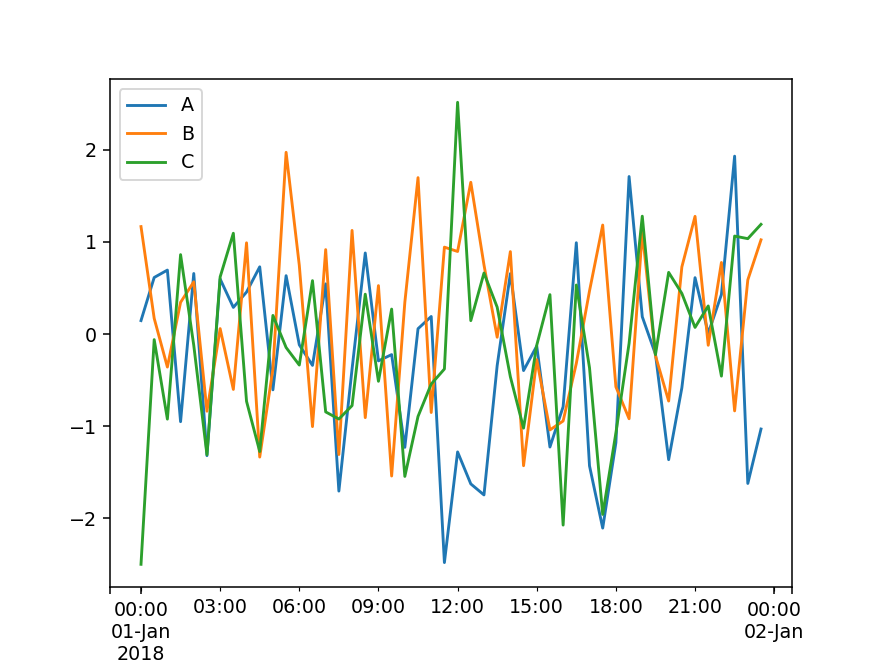

In [45]:
df.plot()
plt.legend(loc='best')
plt.show()

In [46]:
df2 = df.cumsum()
df2

,A,B,C
2018-01-01 00:00:00,0.146358,1.165782,-2.497444
2018-01-01 00:30:00,0.760198,1.336225,-2.557710
2018-01-01 01:00:00,1.454301,0.978416,-3.480173
2018-01-01 01:30:00,0.503987,1.322812,-2.618421
2018-01-01 02:00:00,1.161074,1.889311,-2.740810
2018-01-01 02:30:00,-0.157837,1.052511,-4.049837
2018-01-01 03:00:00,0.439565,1.111817,-3.429764
2018-01-01 03:30:00,0.728950,0.511289,-2.336170
2018-01-01 04:00:00,1.184623,1.501162,-3.065432
2018-01-01 04:30:00,1.913946,0.167059,-4.339475


<IPython.core.display.Javascript object>


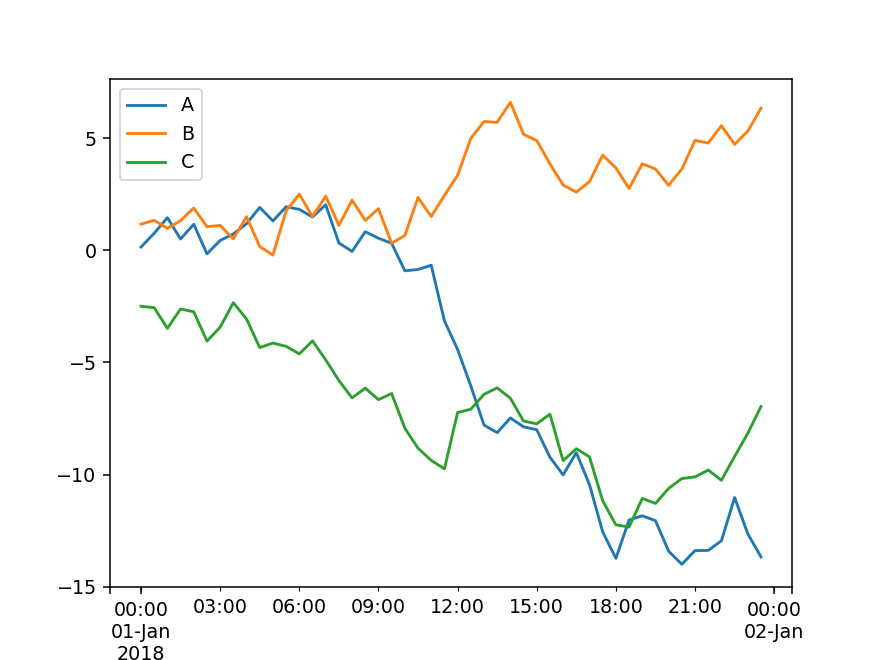

In [47]:
df2.plot()
plt.legend(loc='best')
plt.show()

### Course Materials on YouTube and GitHub

- Course videos are hosted by YouTube ( http://youtube.com/yongtwang ).
- Course documents (Jupyter Notebooks and Python source code) are hosted by GitHub ( http://github.com/yongtwang ).